### Performance Metrics 
- Quantitative tests for effectiveness of a model.  
- Identify the areas for improvement and optimization.   

##### Confusion Matrix in Classification     
|               | Positive Prediction | Negative Prediction|  
|-|-|-|  
|Positive Class | True Positive (TP) - Hit | False Negative (FN) Miss, type 2 error|  
|Negative Class | False Positive (FP) False Alarm, type 1 error| True Negative (TN) correct rejection|  

![](../Figures/precn_recall.PNG)

![](../Figures/Precisionrecall.png)

A Bloom filter can either tell you with certainty that an item is not a member of a set, or that it probably is.  
[bloomlib 0.0.2](https://pypi.org/project/bloomlib/)  



classification accuracy = $100* \frac{correct\ predictions}{total\ predictions}$   

Error rate = $100* (1 -  \frac{correct\ predictions}{total\ predictions})$   



#### Classification Metrics      
See 02.01 Statistics Notations   
##### Precision and Recall   

Maximizing precision will minimize the number false positives,  
whereas maximizing the recall will minimize the number of false negatives.  

<u>Precision</u>: Appropriate when minimizing false positives is the focus.   
<u>Recall</u>: Appropriate when minimizing false negatives is the focus.  

**bell**, cell, dell, fell, hell, sell, tell,  **well**, yell   
my name is not in the water list   

<u>Increases in recall often come at the expense of decreases in precision</u>.

Precision for Binary Classification 
$Precision = \frac{TruePositives}{TruePositives + FalsePositives}$      

In a multi-class problem 
$Precision = \frac{\sum TruePositives}{\sum TruePositives + \sum FalsePositives}$   



$Recall = \frac{TruePositives}{TruePositives + FalseNegatives}$ 

**When the system makes a mistake, which would you rather get – a false positive, or a false negative?**      
- To minimize false positives, prefer precision.   
- To minimize false negatives, prefer recall.

##### F-Measure - F-Score or the F1-Score   
F-Measure combines precision and recall into a single measure that captures both properties.  
It thus symmetrically represents both precision and recall in one metric.  

$F-Measure = \frac{2\ *\ Precision\ *\ Recall}{Precision\ +\ Recall}$   

0.0 to 1.0.  

The F-value in an ANOVA is calculated as: variation between sample means / variation within the samples.   
The higher the F-value in an ANOVA, the higher the variation between sample means relative to the variation within the samples.   
The higher the F-value, the lower the corresponding p-value.  

It is a measure of a test's accuracy.  

In [1]:
from sklearn.metrics import confusion_matrix
import pandas as pd
from random import randint
import numpy as np
import seaborn as sns

In [2]:
dataset = pd.read_excel('../Data/Height_Weight_Sample.xlsx')
array = dataset.values
X_train = array[:,0:3]
y_train = array[:,3]

In [3]:
from sklearn import tree
tree_classifier = tree.DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [4]:
predicted = tree_classifier.predict(X_train)

In [5]:
from sklearn.metrics import accuracy_score
print(f"\naccuracy_score = {accuracy_score(predicted,y_train)}")

print(f"\nconfusion matrix\n{confusion_matrix(y_train, predicted)}\n")


accuracy_score = 0.9927536231884058

confusion matrix
[[66  0]
 [ 1 71]]


In [6]:
confused = confusion_matrix(y_train, predicted)
df_confused = pd.DataFrame(confused, index=['Female', 'Male'], columns=['Female','Male'])
df_confused

Female  Male
Female      66     0
Male         1    71

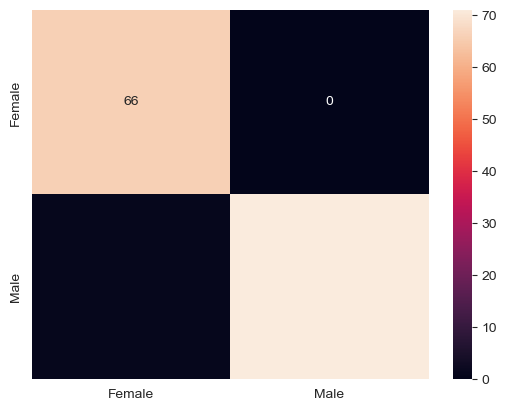

In [7]:
hot = pd.DataFrame(df_confused, index=['Female', 'Male'], columns=['Female','Male'])
sns.heatmap(hot, annot=True);


#### Topics on model evaluation in Part 2     
- confusion matrix,   
- accuracy,   
- precision,   
- recall,   
- F1-Score,   
- cross validation,   
- area under curve,   
- gradient Boosting.     

#### Regression Metrics      
Commonly used:  
- Mean Squared Error (MSE)  
- Root Mean Squared Error (RMSE)  
- Mean Absolute Error (MAE)  

The differences between observed and predicted values of data is called **residual** = $y_i – \hat y_i$

$MSE = \frac{\sum _i ^N (y_i – \hat y_i)^2}{N}$    
 where $y_i$ is the i’th expected value in the dataset and $\hat y_i$ is the i’th predicted value.  
Squaring also has the effect of magnifying large errors.  
This has the effect of “punishing” models more for larger errors when MSE is used as a loss function.  
It also has the effect of “punishing” models by inflating the average error score when used as a metric.   

$RMSE = \sqrt{\frac{\sum _i ^N (y_i – \hat y_i)^2}{N}}$   
$RMSE = \sqrt{MSE}$   


$MAE = \frac{\sum _i ^N  abs(y_i – \hat y_i)}{N}$   


#### Coefficient of determination - $R^2$ score        
$R^2$ score is used to evaluate the performance of a linear regression model.  
It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s).  
It is used to check how well-observed results are reproduced by the model,  
depending on the ratio of total deviation of results described by the model.   

$$R^2 = 1- \frac{SSres}{TStot}$$   
Where,   
SSres (aka RSS) is the **S**um of **S**quares of the **res**idual-errors($y - \hat{y}$).   
SStot (aka TSS) is the **tot**al **S**um of **S**quares of the errors($y - \bar{y}$).   
$$ R^2 = 1 - \frac{RSS}{TSS}$$

$$R^2 = \frac{\sum(y_i - \hat y_i)^2}{\sum(y_i - \bar y_i)^2}$$

<u>Interpretation</u>:   
Assume  $R^2$ = 0.68  
68% of the changeability of the dependent output attribute can be explained by the model  
while the remaining 32 % of the variability is still unaccounted for.  

$R^2$ indicates the proportion of data points which lie within the line created by the regression equation.  

In [8]:
from sklearn.metrics import r2_score 

<u>Example 1</u>

|y|y_hat|y - y_hat|(y - y_hat)${^2}$|y - y_bar|(y - y_bar)$^2$|         
|:-:|:-:|:-:|:-:|:-:|:-:|   
|10|10|0|0|-10|100|    
|20|20|0|0|0|0|     
|30|30|0|0|10|100|     
|mean=20|||sum=0||sum=200|     


$$R^2 = 1 - \frac{0}{200} = 1$$

In [9]:
y =[10, 20, 30] 
𝑦̂  =[10, 20, 30] 
r2 = r2_score(y, 𝑦̂ ) 
print('r2 score for perfect model:', r2) 

r2 score for perfect model: 1.0


<u>Example 2</u>

|y|y_hat|y - y_hat|(y - y_hat)${^2}$|y - y_bar|(y - y_bar)$^2$|         
|:-:|:-:|:-:|:-:|:-:|:-:|   
|10|20|10|100|-10|100|    
|20|20|0|0|0|0|     
|30|20|-10|100|10|100|    
|mean=20|||sum=200||sum=200|     

$$R^2 = 1 - \frac{200}{200} = 0$$

In [10]:
y =[10, 20, 30] 
𝑦̂  =[20, 20, 20] 
r2 = r2_score(y, 𝑦̂ ) 
print('r2 score for a model which always predicts mean value:', r2) 

r2 score for a model which always predicts mean value: 0.0


In [11]:
import pandas as pd
import math
import random
import joblib
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

#### Regression Model to predict BMI from height and weight   
Read student file with height and weight columns   
drop rows with NaN   
Add column BMI    

In [12]:
df = pd.read_excel('../Data/BSc22A_Student_Data.xlsx', usecols=['Height_cm', 'Weight_Kg'])
df['BMI'] = df.Weight_Kg/(df.Height_cm/100)**2
df = df.dropna()
df.head()

Height_cm  Weight_Kg        BMI
0      164.0       50.0  18.590125
1      169.0       49.0  17.156262
2      174.0       59.0  19.487383
3      175.0       63.0  20.571429
4      185.0       50.0  14.609204

##### Make training set   

In [13]:
array = df.values
X_train = array[:,0:2]
y_train = array[:,2]

##### Model with the sample   

In [14]:
regressor = LinearRegression()
bmi_model = regressor.fit(X_train, y_train)

##### Accuracy with the training set   

In [15]:
Score = bmi_model.score(X_train, y_train)
print(f"{Score = }")

Score = 0.9966626056995165


In [16]:
X1 = bmi_model.predict(X_train)
X1 = X1.reshape(1, -1)[0]
X2 = y_train.reshape(1, -1)[0]
data = zip(X1, X2)
df_score = pd.DataFrame(list(data), columns=['y_hat','y'])
df_score['residual'] = df_score.y - df_score.y_hat
df_score.head()

y_hat          y  residual
0  18.709435  18.590125 -0.119310
1  17.339727  17.156262 -0.183465
2  19.441767  19.487383  0.045616
3  20.493402  20.571429  0.078027
4  14.282236  14.609204  0.326968

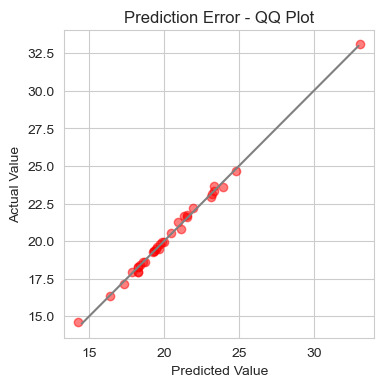

In [17]:
plt.figure(figsize=(4,4))
plt.scatter(df_score.y_hat, df_score.y,  color='red', alpha=0.5)
plt.plot( [14.5,33], [14.5,33],  color='grey')
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("Prediction Error - QQ Plot");

##### Residual Distribution  
Linear regression assumes that the model residuals are normally distributed.
A good residual plot will follow a normal distribution.
A bad residual plot will show skewness and reveal patterns in residuals.

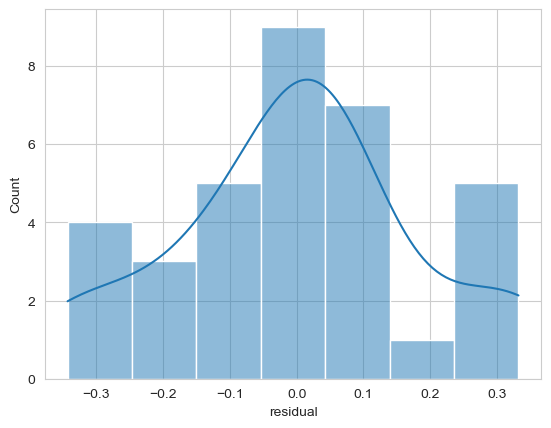

In [18]:
sns.histplot(data=df_score, x='residual', kde=True);

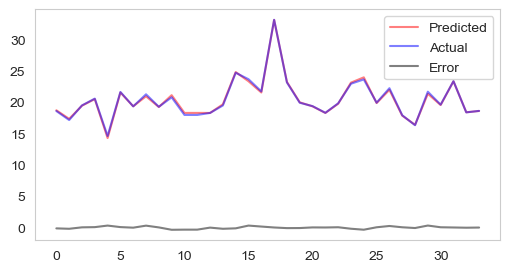

In [19]:
plt.figure(figsize=(6,3))
plt.plot(df_score.y_hat, c='red', label='Predicted', alpha=0.5)
plt.plot(df_score.y,c='blue', label='Actual', alpha=0.5)
plt.plot(df_score.residual,c='grey', label='Error')
plt.grid()
plt.legend();

In [20]:
df_score['RSS'] = (df_score.y - df_score.y_hat)**2 # square of error 
df_score['TSS'] = (df_score.y - df_score.y.mean())**2   
df_score['AE'] = abs(df_score.y - df_score.y.mean())   
df_score.head()

y_hat          y  residual       RSS        TSS        AE
0  18.709435  18.590125 -0.119310  0.014235   3.396469  1.842951
1  17.339727  17.156262 -0.183465  0.033659  10.737510  3.276814
2  19.441767  19.487383  0.045616  0.002081   0.894336  0.945693
3  20.493402  20.571429  0.078027  0.006088   0.019141  0.138353
4  14.282236  14.609204  0.326968  0.106908  33.917488  5.823872

In [21]:
print(f"Mean Absolute Error (MAE)       {df_score.AE.mean()}")
print(f"Mean Squared Error (MSE)        {df_score.RSS.mean()}")
print(f"Root Mean Squared Error (RMSE)  {math.sqrt(df_score.RSS.mean())}")
R2 = 1 - df_score['RSS'].sum()/df_score['TSS'].sum()
print(f"Accuracy Score                  {R2}")


Mean Absolute Error (MAE)       2.256494469112056
Mean Squared Error (MSE)        0.03320690905047516
Root Mean Squared Error (RMSE)  0.18222762976693507
Accuracy Score                  0.9966626056995165


#### Task   
Check accuracy of the above model
1. Using /Data/Height_Weight_Sample.xlsx as validation set.  
2. Using Puma_Indian data from /Data/seven_schools.xlsx as validation set.
3. Make a summary report of your observations. 

---
#### Error Types by Category        
1. <u>Regression</u>   
    - Mean Absolute Error (MAE)   
        .. Average absolute difference between the predicted and actual value.  
        .. Simple assessment of prediction accuracy.  
    - Mean Squared Error (MSE)  
        .. average squared difference between the predicted and actual values.  
        .. Larger errors inflate the overall metric  
    - Root Mean Squared Error   
        .. square root of MSE  
    - R-squared  
        .. proportion of the variance in the target variable explained by the regression model.  
    - Adjusted R-squared  
        .. Similar to R-squared.  
        .. But accounts for the number of predictors (features) in the model.  
    - Mean Absolute Percentage Error   
        .. average percentage difference between the predicted and actual values.  
        .. Typically used when the scale of the target variable is significant.  


2. <u>Classification</u>   
    - Accuracy   
        .. proportion of correct predictions, irrespective of the class.  
        .. overall assessment of classification performance.  
    - Balanced Accuracy   
        
    - Precision   
        ..proportion of correct positive predictions.  
        ..It is the accuracy of the model only on the positive predictions.  
    - Recall (Sensitivity)  
        .. Measures the proportion of correctly classified positive samples in the dataset.  
        .. Accuracy of the model on positive instances in the dataset.  

    - Specificity   
        ..Opposite of Recall.  
        ..proportion of correctly classified negative samples in the dataset.  
        ..accuracy of the model on negative instances in the dataset.  

    - Negative Predictive Value   
        ..Opposite of Precision.   
        .. proportion of negative predictions that were correct.  
        .. accuracy of the model only on the negative predictions.  

    - F1 Score  
        ..The harmonic mean of precision and recall.  
        ..a balanced measure between the two.  
    - Correlation Coefficient  
        .. Takes into account TP, TN, FP, and FN predictions to measure the performance of binary classifier.  
        .. a balanced performance measure unaffected by class imbalance.  